<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_main_trans_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [6]:
df1 = pd.read_excel('output_main_trans_g11.xlsx')

In [7]:
df1.head(10)

,AssetID_8312,AssetID_8313,AssetID_8314,date
0,65.0,61.0,7.0,2021-03-20 19:53:17
1,64.0,60.0,7.0,2021-03-21 02:03:46
2,72.0,66.0,7.0,2021-03-21 08:08:17
3,67.0,62.0,7.0,2021-03-21 13:45:47
4,70.0,64.0,7.0,2021-03-21 20:15:08
5,68.0,62.0,7.0,2021-03-22 00:37:54
6,67.0,62.0,7.0,2021-03-22 06:47:22
7,67.0,63.0,7.0,2021-03-22 12:49:25
8,63.0,58.0,7.0,2021-03-22 18:58:29
9,63.0,58.0,7.0,2021-03-23 00:46:12


In [8]:
df1.columns

Index(['AssetID_8312', 'AssetID_8313', 'AssetID_8314', 'date'], dtype='object')

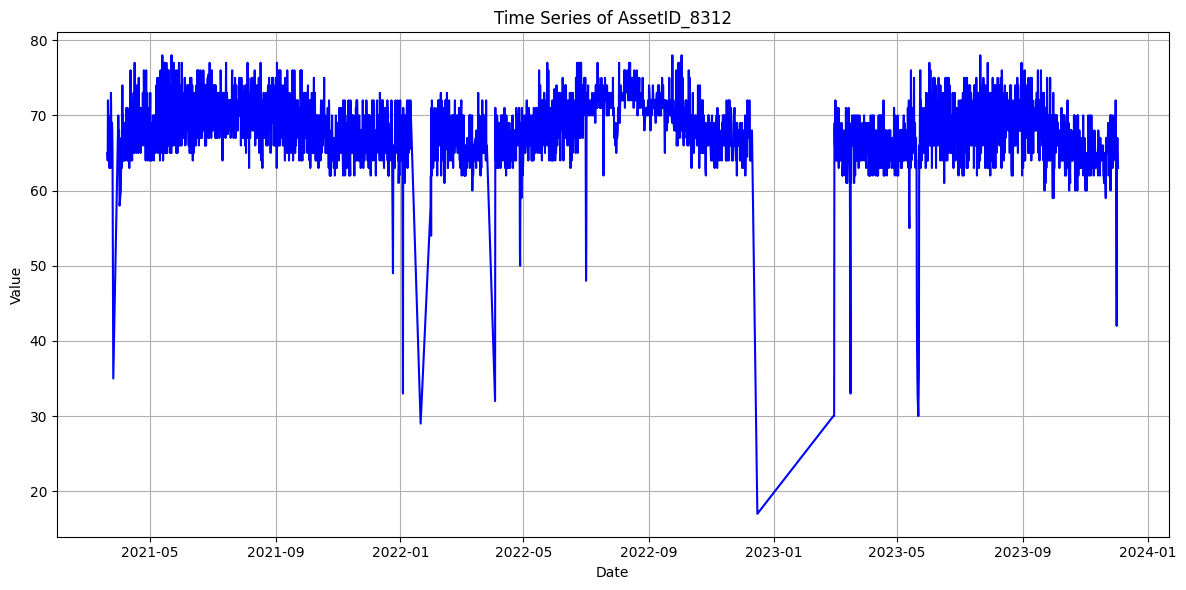

In [10]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8312'], color='blue')
plt.title('Time Series of AssetID_8312')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

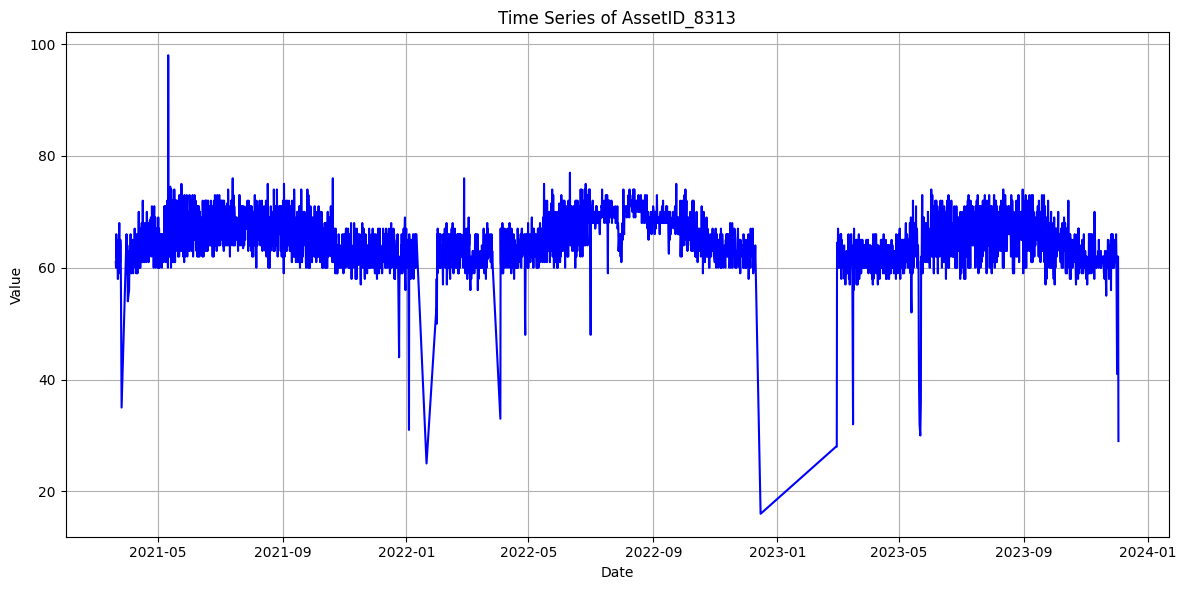

In [11]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8313'], color='blue')
plt.title('Time Series of AssetID_8313')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()